In [1]:
from citipy import citipy
import csv as csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req

In [2]:
api_key = 'f215a06c68a032e58eaca437de60be88'
cities = pd.read_csv('worldcities.csv')
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
cities.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [3]:
first = cities[(cities['Latitude'].astype(int) > 60)]
second = cities[(cities['Latitude'].astype(int) <= 60) & (cities['Latitude'].astype(int) > 20)]
third = cities[(cities['Latitude'].astype(int) > -20) & (cities['Latitude'].astype(int) <= 20)]
fourth = cities[(cities['Latitude'].astype(int) <= -20) & (cities['Latitude'].astype(int)  >= -35)]
fifth = cities[(cities['Latitude'].astype(int) <-35)]                                               
first_sample = first.sample(83)
second_sample = second.sample(83)
third_sample = third.sample(166)
fourth_sample = fourth.sample(84)
fifth_sample = fifth.sample(83)
samples = [first_sample, second_sample, third_sample, fourth_sample, fifth_sample]
sample = pd.concat(samples)
sample.head()

,Country,City,Latitude,Longitude
25851,no,groa,62.650000,8.716667
35657,ru,chupa,66.270013,33.054858
38679,ru,udachnyy,66.416667,112.400000
26135,no,verdalsora,63.800000,11.483333
25914,no,kolvereid,64.850000,11.600000


In [4]:
sample['Max Temp (f)'] = ''
sample['Humidity'] =''
sample['Cloudiness']=''
sample['Wind Speed(MPH)']=''
for index,row in sample.iterrows():
    query_url = url + 'appid=' + api_key + "&units=" + units + '&lat=' + str(row['Latitude']) + '&lon=' + str(row['Longitude'])
    city_info = req.get(query_url).json()
    city_temp = city_info['main']['temp_max']
    city_humid = city_info['main']['humidity']
    city_cloud = city_info['clouds']['all']
    city_wind_spd = city_info['wind']['speed']
    sample.set_value(index, 'Max Temp (f)',city_temp)
    sample.set_value(index, 'Humidity',city_humid)
    sample.set_value(index, 'Cloudiness',city_cloud)
    sample.set_value(index, 'Wind Speed(MPH)',city_wind_spd)
    print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=62.65&lon=8.716667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=66.270013&lon=33.054858
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=66.416667&lon=112.4
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=63.8&lon=11.483333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=64.85&lon=11.6
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=67.583333&lon=63.916667000000004
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=61.884848999999996&lon=50.748925
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&l

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=61.559777000000004&lon=45.933956
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=64.4165&lon=40.8122
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=63.916667000000004&lon=24.966667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=70.4833333&lon=-21.966666699999998
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=66.083333&lon=60.516667000000005
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=63.65&lon=22.683332999999998
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=62.483332999999995&lon=6.8
http://api.openweathermap.org/data/2.5/weather?appid=f2

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=48.321494&lon=22.191066
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=39.041667&lon=29.41
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=37.978055600000005&lon=-122.03
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=50.878539&lon=15.181515
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=55.472102&lon=39.080172999999995
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=49.658333299999995&lon=6.1372222
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=33.6802778&lon=-116.17305559999998
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a0

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=14.7833333&lon=-88.7
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=14.45&lon=-11.433333300000001
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=16.766667&lon=-97.983333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=8.341111&lon=124.25916699999999
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-5.45&lon=-39.716667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-6.735&lon=110.8444
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=16.4&lon=-92.383333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=impe

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=16.3045&lon=121.1062
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=15.916666699999999&lon=-86.0
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=4.4333333&lon=14.366666699999998
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=13.370999999999999&lon=123.4202
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=16.25&lon=-61.2666667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-10.433333&lon=-39.333333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-13.816666699999999&lon=-171.91666669999998
http://api.openweathermap.org/data/2.5/weather?appid=f215a

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=7.75&lon=-80.2833333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=15.46405&lon=120.68643200000001
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=12.980556&lon=123.78916699999999
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=15.416667000000002&lon=77.883333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=4.748508&lon=-6.636301
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=14.1447&lon=121.3152
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-11.233333&lon=-38.483333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca43

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-27.233333000000002&lon=-52.016667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-30.666666999999997&lon=-51.383333
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-23.8&lon=-45.416667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-24.785895999999997&lon=-65.411664
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-22.383333&lon=-44.966667
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-22.133333&lon=-56.516667000000005
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-20.135&lon=57.521111100000006
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-43.250075&lon=-65.313295
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-43.766667&lon=172.3
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-38.113419&lon=145.283264
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-36.816666999999995&lon=174.45
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-42.883209&lon=147.331665
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-37.25&lon=174.75
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units=imperial&lat=-41.176949&lon=146.351517
http://api.openweathermap.org/data/2.5/weather?appid=f215a06c68a032e58eaca437de60be88&units

In [5]:
sample.head()
sample.Latitude = pd.to_numeric(sample.Latitude, errors ='coerce')
latitude = sample.Latitude
sample['Max Temp (f)'] = pd.to_numeric(sample['Max Temp (f)'], errors ='coerce')
temp = sample['Max Temp (f)']
sample.Humidity = pd.to_numeric(sample.Humidity, errors = 'coerce')
humidity = sample.Humidity
sample.Cloudiness = pd.to_numeric(sample.Cloudiness, errors = 'coerce')
cloudiness = sample.Cloudiness
sample['Wind Speed(MPH)'] = pd.to_numeric(sample['Wind Speed(MPH)'], errors = 'coerce')
windspeed = sample['Wind Speed(MPH)']

sample.head()

,Country,City,Latitude,Longitude,Max Temp (f),Humidity,Cloudiness,Wind Speed(MPH)
25851,no,groa,62.650000,8.716667,46.40,93,75,6.93
35657,ru,chupa,66.270013,33.054858,30.63,99,48,8.30
38679,ru,udachnyy,66.416667,112.400000,15.24,76,12,6.40
26135,no,verdalsora,63.800000,11.483333,41.00,86,90,6.93
25914,no,kolvereid,64.850000,11.600000,44.60,81,75,11.41


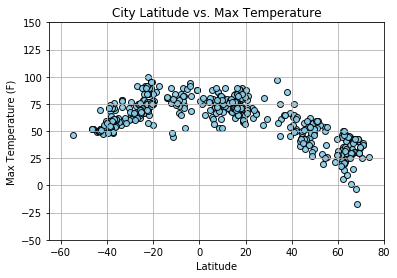

In [7]:
plt.scatter(latitude, temp,alpha=.9,c = 'skyblue',linewidth = 1,edgecolor = 'black')
plt.xlim([-65 , 80])
plt.ylim([-50, 150])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.show()

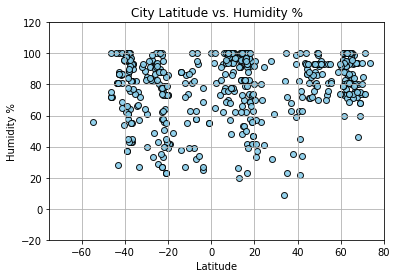

In [11]:
plt.scatter(latitude, humidity,alpha=.9,c = 'skyblue',linewidth = 1,edgecolor = 'black')
plt.xlim([-80 , 80])
plt.ylim([-20, 120])
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity %')
plt.grid()
plt.show()

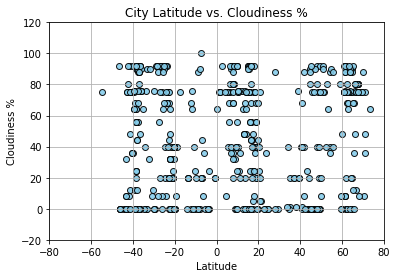

In [9]:
plt.scatter(latitude, cloudiness,alpha=.9,c = 'skyblue',linewidth = 1,edgecolor = 'black')
plt.xlim([-80 , 80])
plt.ylim([-20, 120])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness %')
plt.grid()
plt.show()

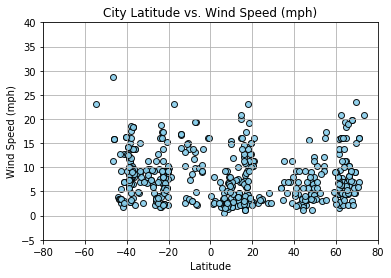

In [10]:
plt.scatter(latitude, windspeed,alpha=.9,linewidth = 1,c = 'skyblue',edgecolor = 'black')
plt.xlim([-80 , 80])
plt.ylim([-5, 40])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.grid()
plt.show()